In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer,f1_score,recall_score,precision_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [4]:
data=load_iris()
df=pd.DataFrame(data.data,columns=data.feature_names)
print(data.feature_names)
print("\n")

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']




In [5]:
df['target']=data.target

In [7]:
x_train,x_test,y_train,y_test=train_test_split(df[data.feature_names],df['target'])
print(len(x_test))
print(len(x_train))

38
112


In [8]:
DT=DecisionTreeClassifier(criterion="gini")
model=DT.fit(x_train,y_train)
y_preds=model.predict(x_test)
print(y_preds)

[0 0 2 1 0 0 2 2 2 1 0 1 0 2 2 1 1 0 0 2 1 2 0 1 0 1 1 2 0 1 2 1 1 0 0 2 2
 0]


[Text(1085.0, 1359.0, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [36, 40, 36]\nclass = versicolor'),
 Text(813.75, 1057.0, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]\nclass = setosa'),
 Text(1356.25, 1057.0, 'petal width (cm) <= 1.75\ngini = 0.499\nsamples = 76\nvalue = [0, 40, 36]\nclass = versicolor'),
 Text(542.5, 755.0, 'petal length (cm) <= 4.95\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]\nclass = versicolor'),
 Text(271.25, 453.0, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = versicolor'),
 Text(813.75, 453.0, 'petal width (cm) <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = virginica'),
 Text(542.5, 151.0, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(1085.0, 151.0, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = versicolor'),
 Text(2170.0, 755.0, 'petal length (cm) <= 4.85\ngini = 0.057\nsamples = 34\nvalue = [0, 1, 33]\nclass = virginica'),
 Text(1898.75, 453.0, 'sepal width (cm) <= 3.1\ngini = 

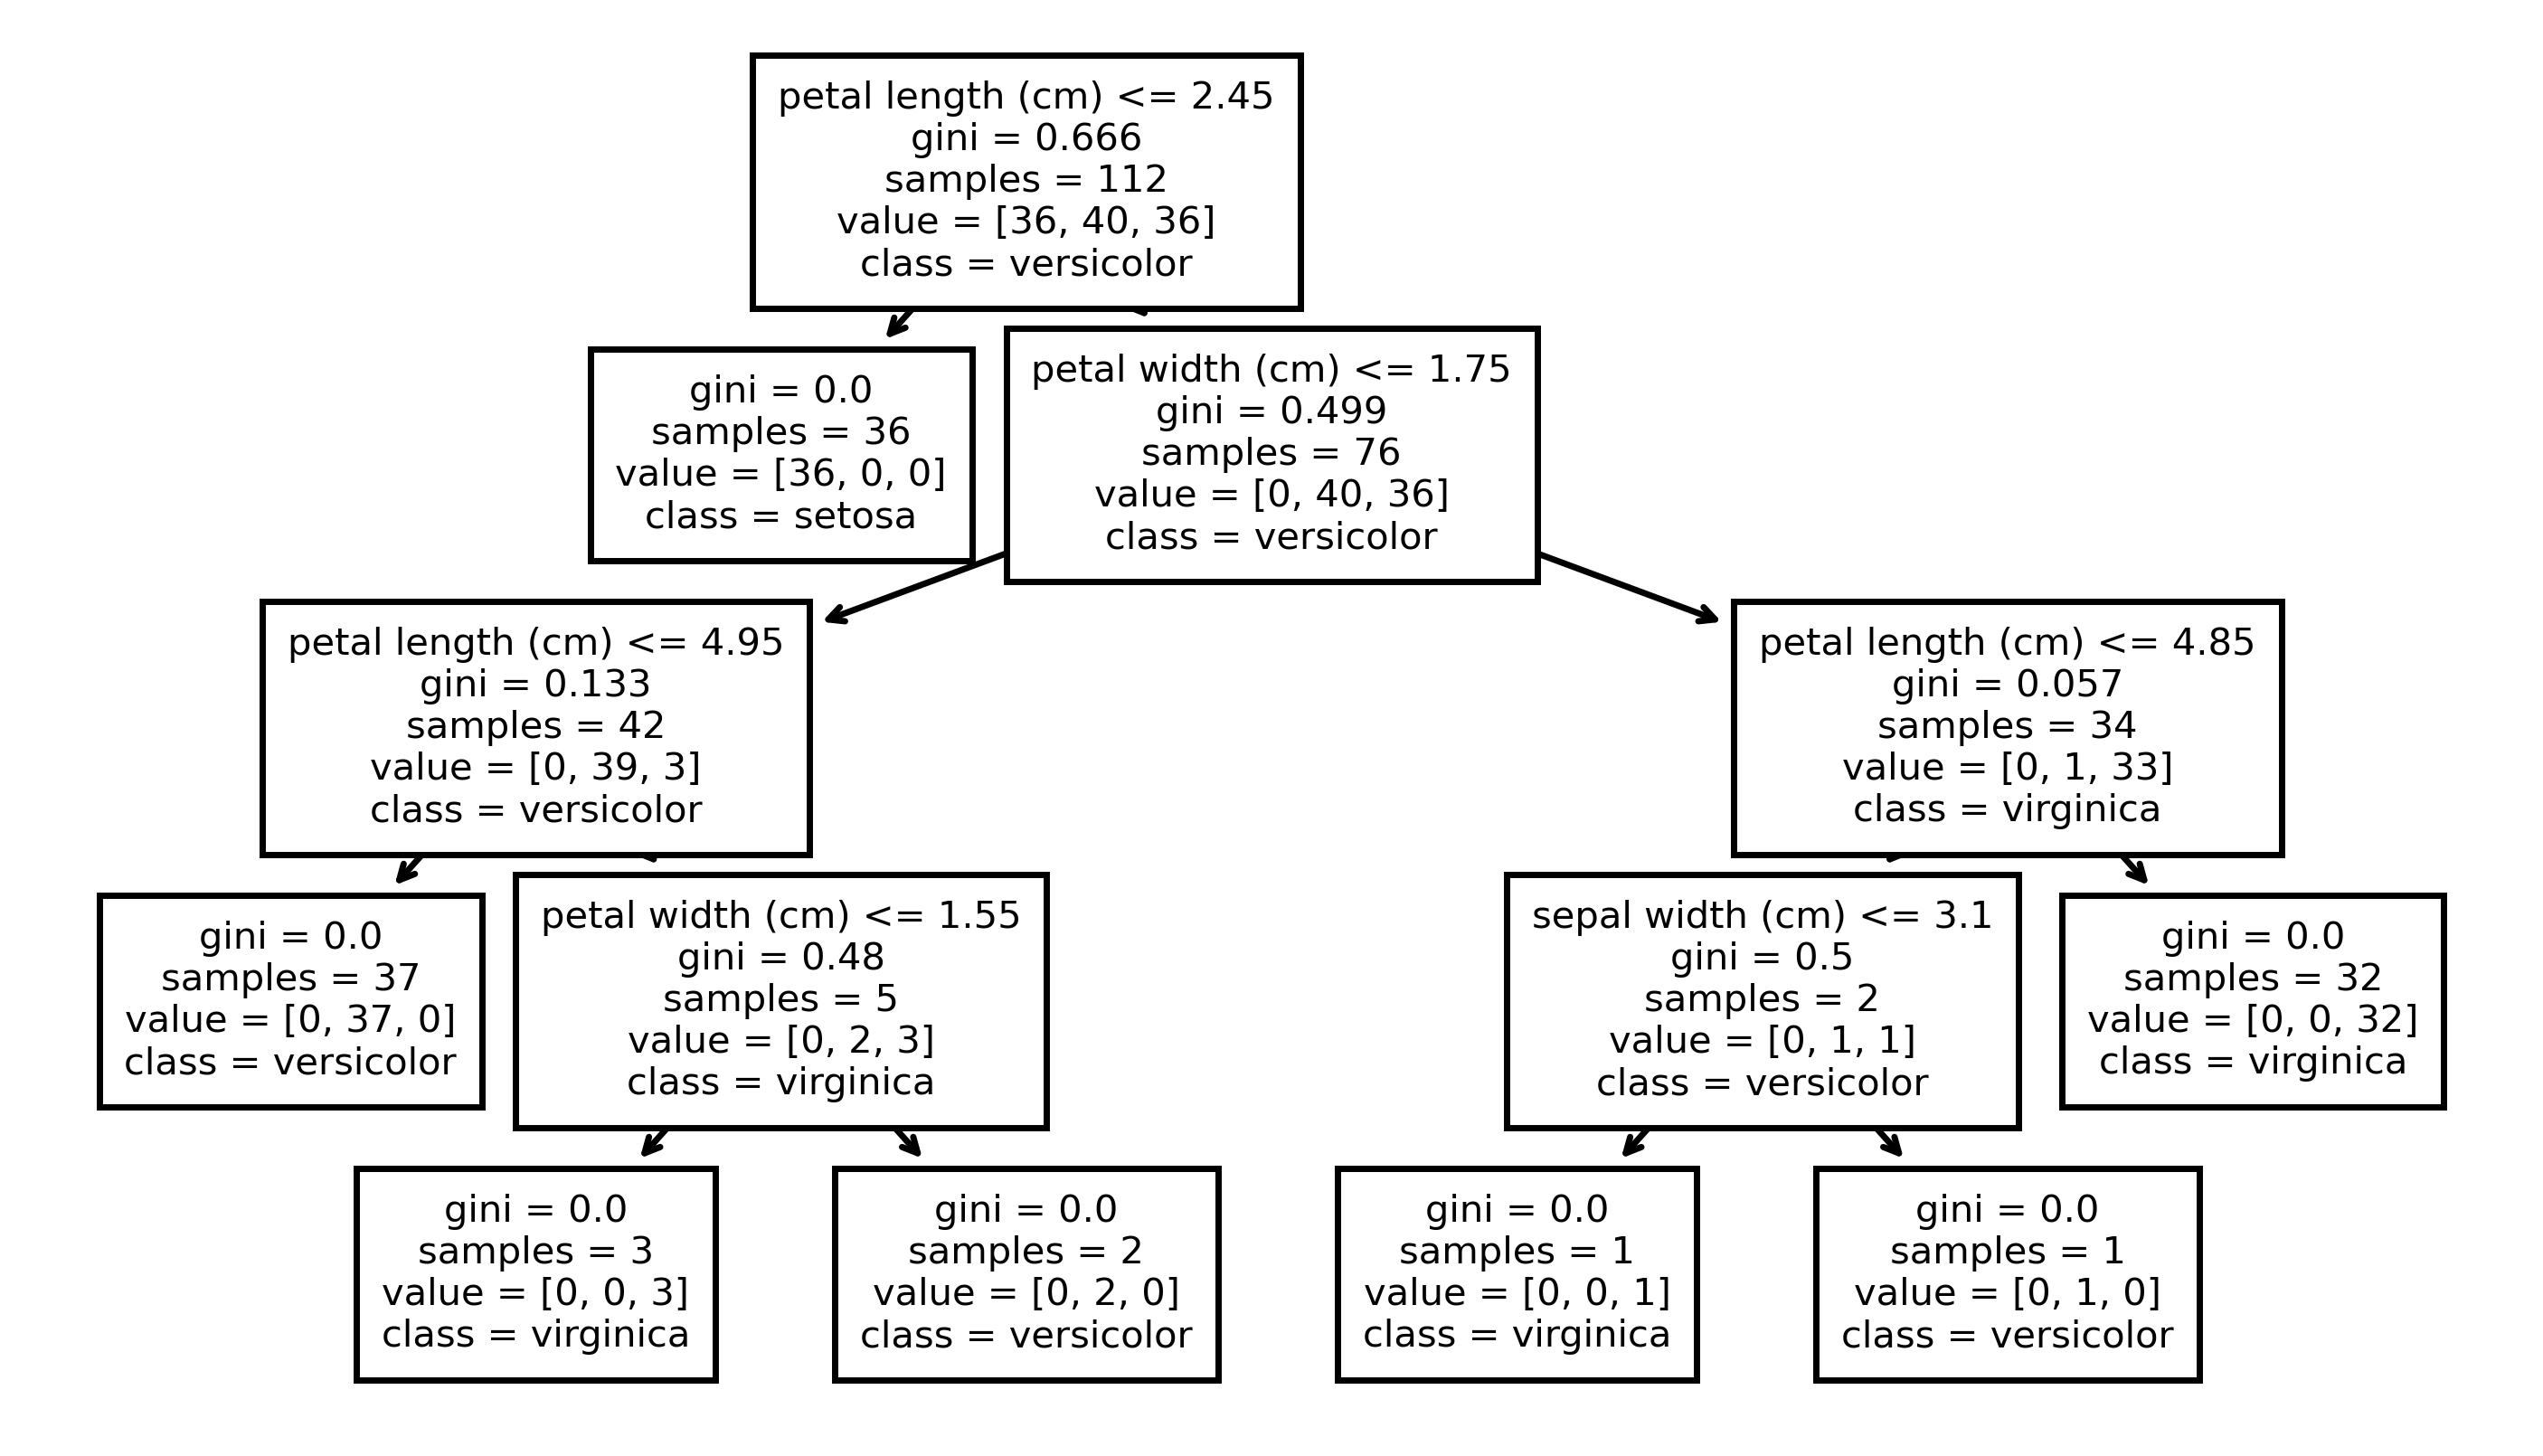

In [9]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(7,4),dpi=500)
tree.plot_tree(DT,fontsize=6,feature_names=data.feature_names,class_names=data.target_names)


In [10]:
labels=[0,1,2]
cmx=confusion_matrix(y_test,y_preds,labels)
print("\n confusion matrix:\n",cmx)
print("\n")
print(classification_report(y_test,y_preds))


 confusion matrix:
 [[14  0  0]
 [ 0 10  0]
 [ 0  2 12]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.83      1.00      0.91        10
           2       1.00      0.86      0.92        14

    accuracy                           0.95        38
   macro avg       0.94      0.95      0.94        38
weighted avg       0.96      0.95      0.95        38



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1, 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
